In [1]:
import tables as tb
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

import invisible_cities.io.dst_io as dio

from utils.plotting_utils import plot_cloud_voxels, plot_cloud_voxels_and_hits, plot_3d_hits

In [2]:
labelled_file = '/Users/mperez/NEXT/data_labelling/examples/prueba.h5'

In [3]:
labelled_MC_voxels = dio.load_dst(labelled_file, 'DATASET', 'MCVoxels')
labelled_MC_hits   = dio.load_dst(labelled_file, 'DATASET', 'MCHits')
labelled_beersheba = dio.load_dst(labelled_file, 'DATASET', 'BeershebaVoxels')
eventInfo = dio.load_dst(labelled_file, 'DATASET', 'EventsInfo')
binsInfo  = dio.load_dst(labelled_file, 'DATASET', 'BinsInfo')

In [4]:
nevent = 34
ids = eventInfo.dataset_id.unique()
dataset_id = ids[nevent]


event_beersh = labelled_beersheba[labelled_beersheba.dataset_id == dataset_id]
event_hits = labelled_MC_hits[labelled_MC_hits.dataset_id == dataset_id]

In [5]:
voxel_size = (binsInfo.size_x.values, binsInfo.size_y.values, binsInfo.size_z.values)

<IPython.core.display.Javascript object>


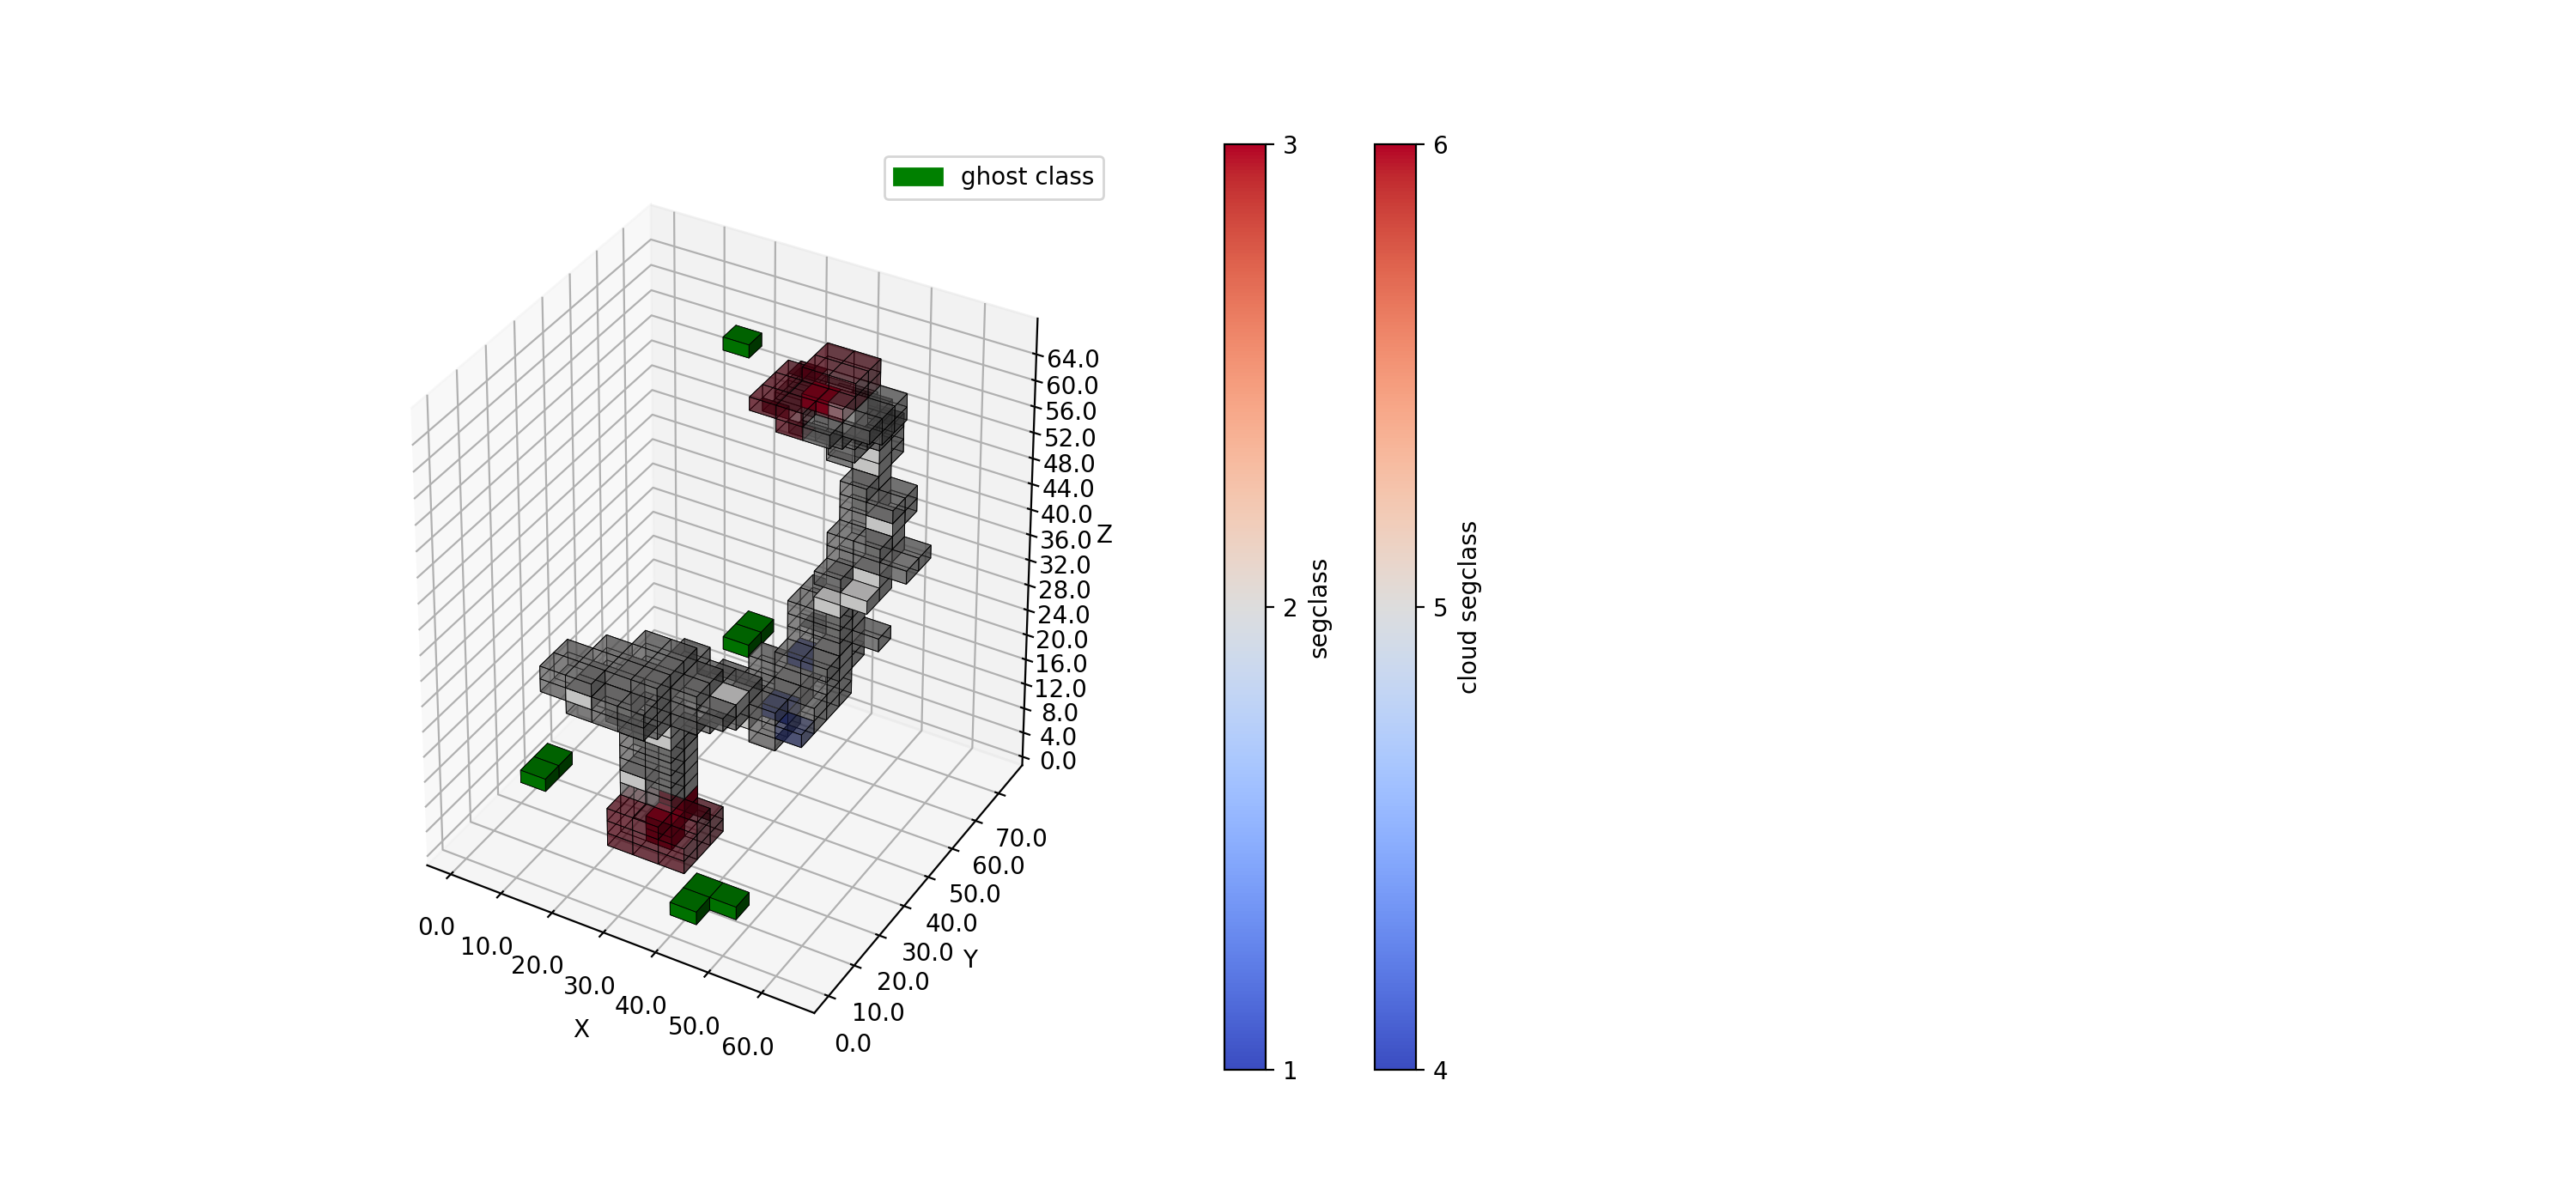

<IPython.core.display.Javascript object>


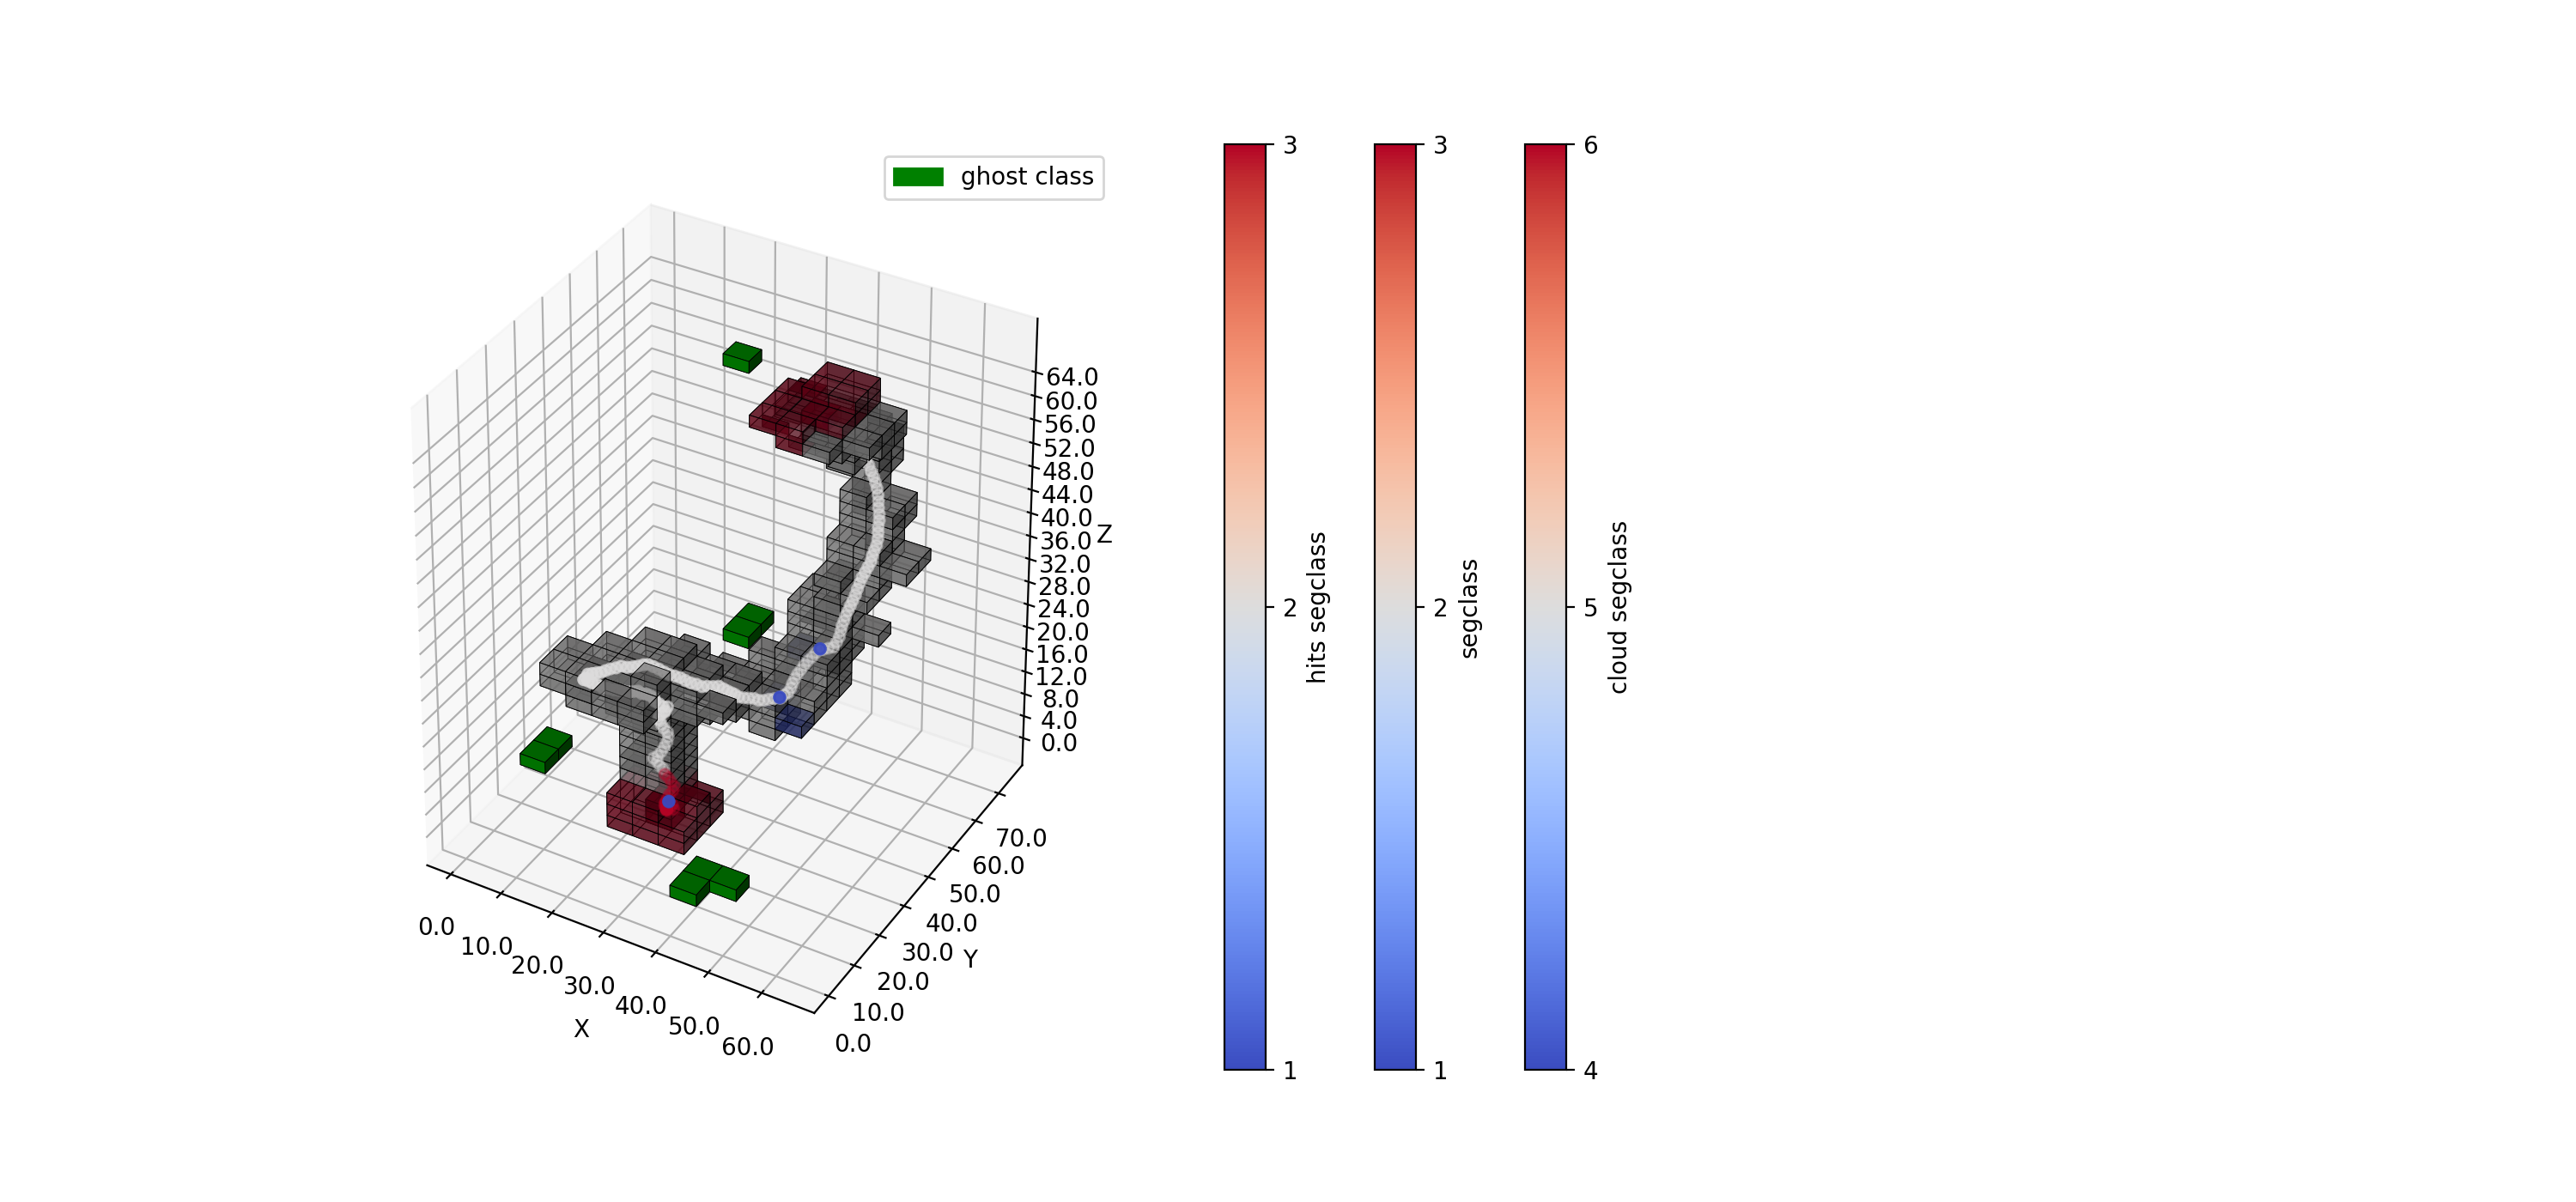

<IPython.core.display.Javascript object>


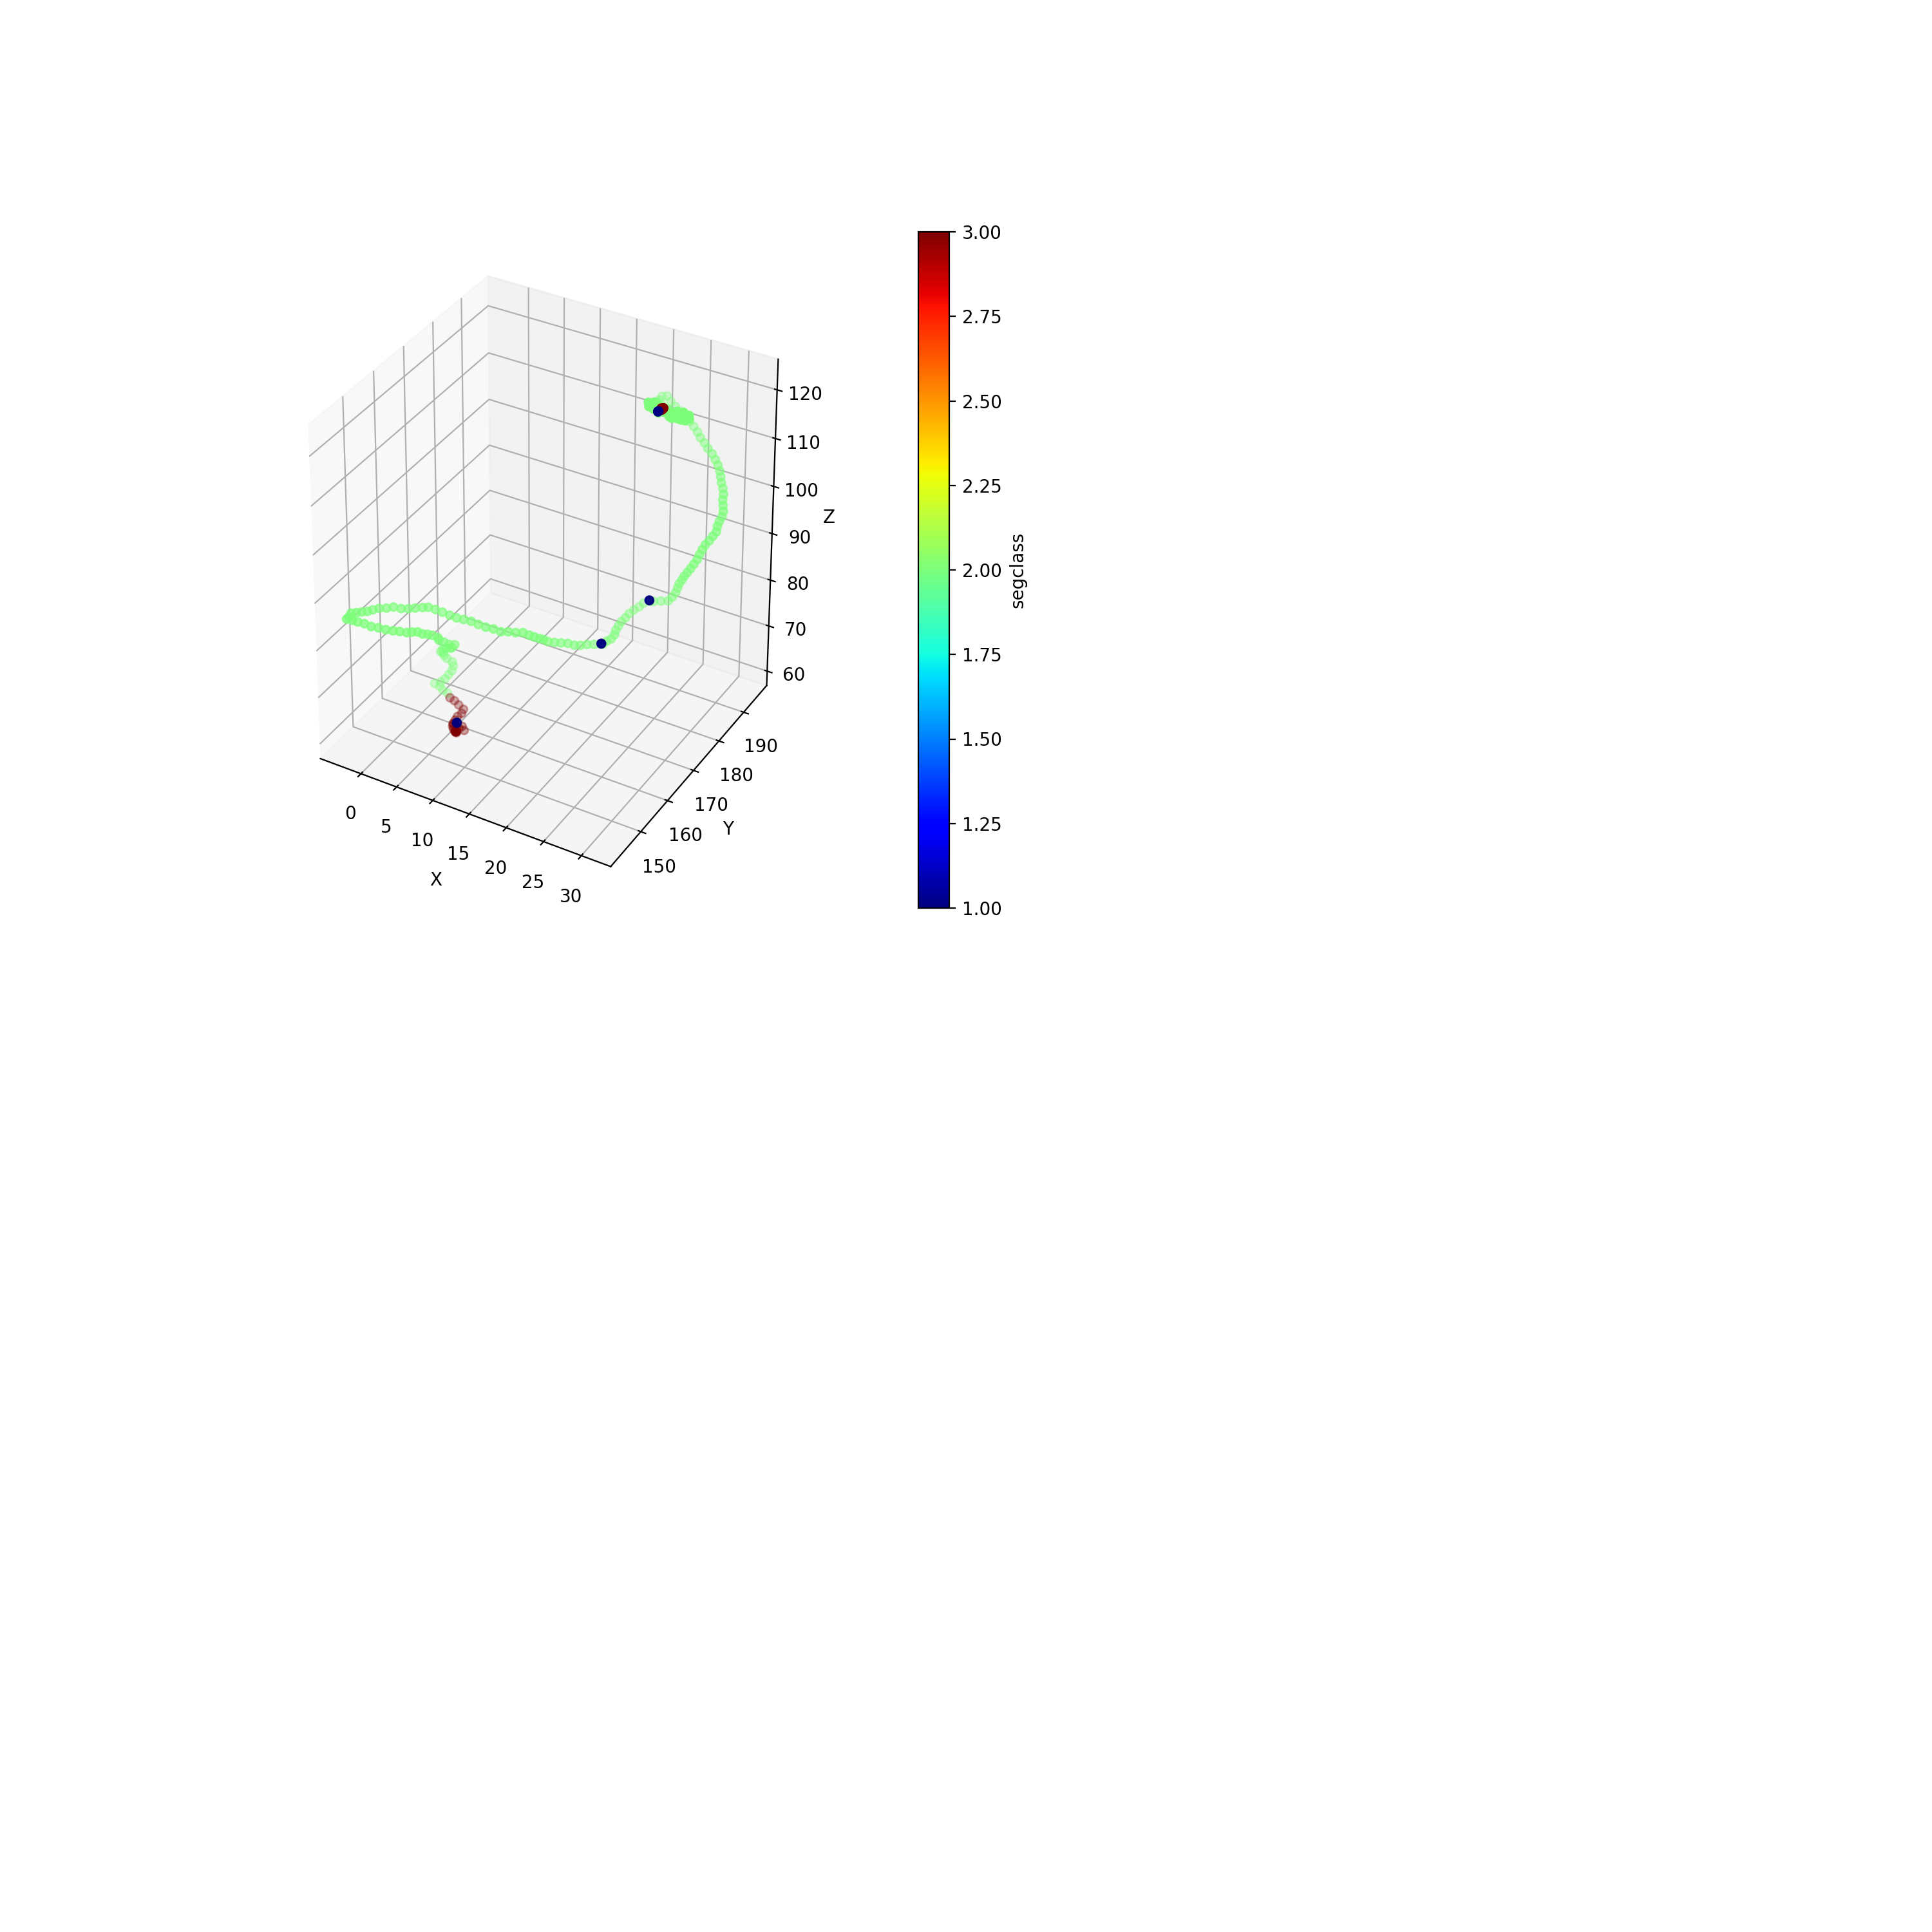

In [6]:
%matplotlib notebook

plot_cloud_voxels(event_beersh, voxel_size, opacity = [1, 0.5])
plot_cloud_voxels_and_hits(event_beersh, event_hits, voxel_size, opacity = [0.6, 0.6])
plot_3d_hits(event_hits, value = 'segclass') #cmap = mpl.cm.coolwarm

In [7]:
origi_voxels = labelled_beersheba[np.isin(labelled_beersheba.segclass, (1, 2, 3))]
neigh_voxels = labelled_beersheba[np.isin(labelled_beersheba.segclass, (4, 5, 6))]
ghost_voxels = labelled_beersheba[np.isin(labelled_beersheba.segclass, 7)]

In [8]:
len(origi_voxels) / len(labelled_beersheba), len(neigh_voxels) / len(labelled_beersheba), len(ghost_voxels) / len(labelled_beersheba)

(0.2597209120401261, 0.7349297103283252, 0.005349377631548673)

<IPython.core.display.Javascript object>


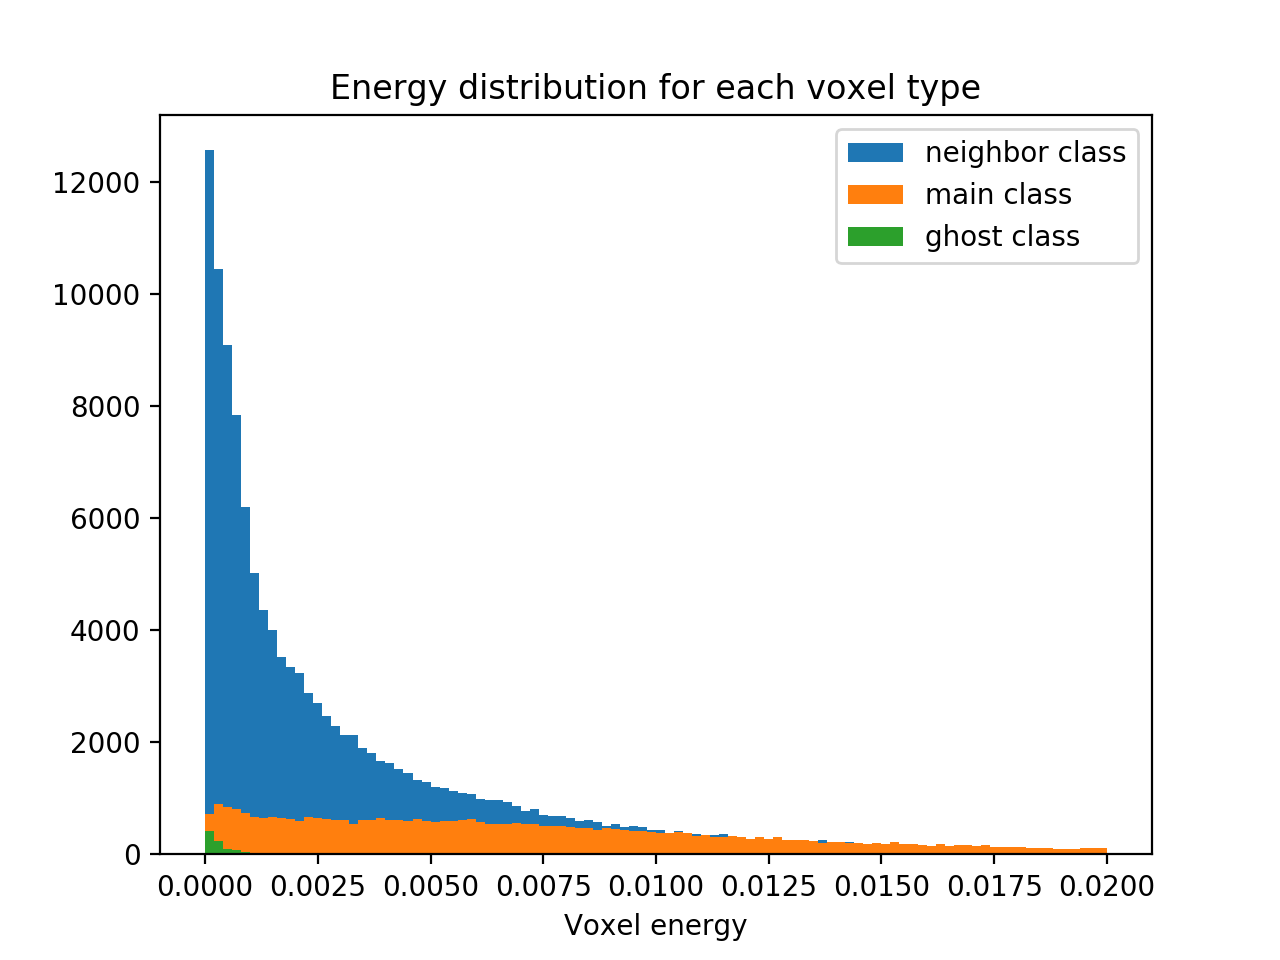

In [9]:
%matplotlib notebook
plt.hist(neigh_voxels.energy, bins = 100, range = (0, 0.02), label = 'neighbor class')
plt.hist(origi_voxels.energy, bins = 100, range = (0, 0.02), label = 'main class')
plt.hist(ghost_voxels.energy, bins = 100, range = (0, 0.02), label = 'ghost class')
plt.title('Energy distribution for each voxel type')
plt.xlabel('Voxel energy')
plt.legend()

plt.show()


<IPython.core.display.Javascript object>


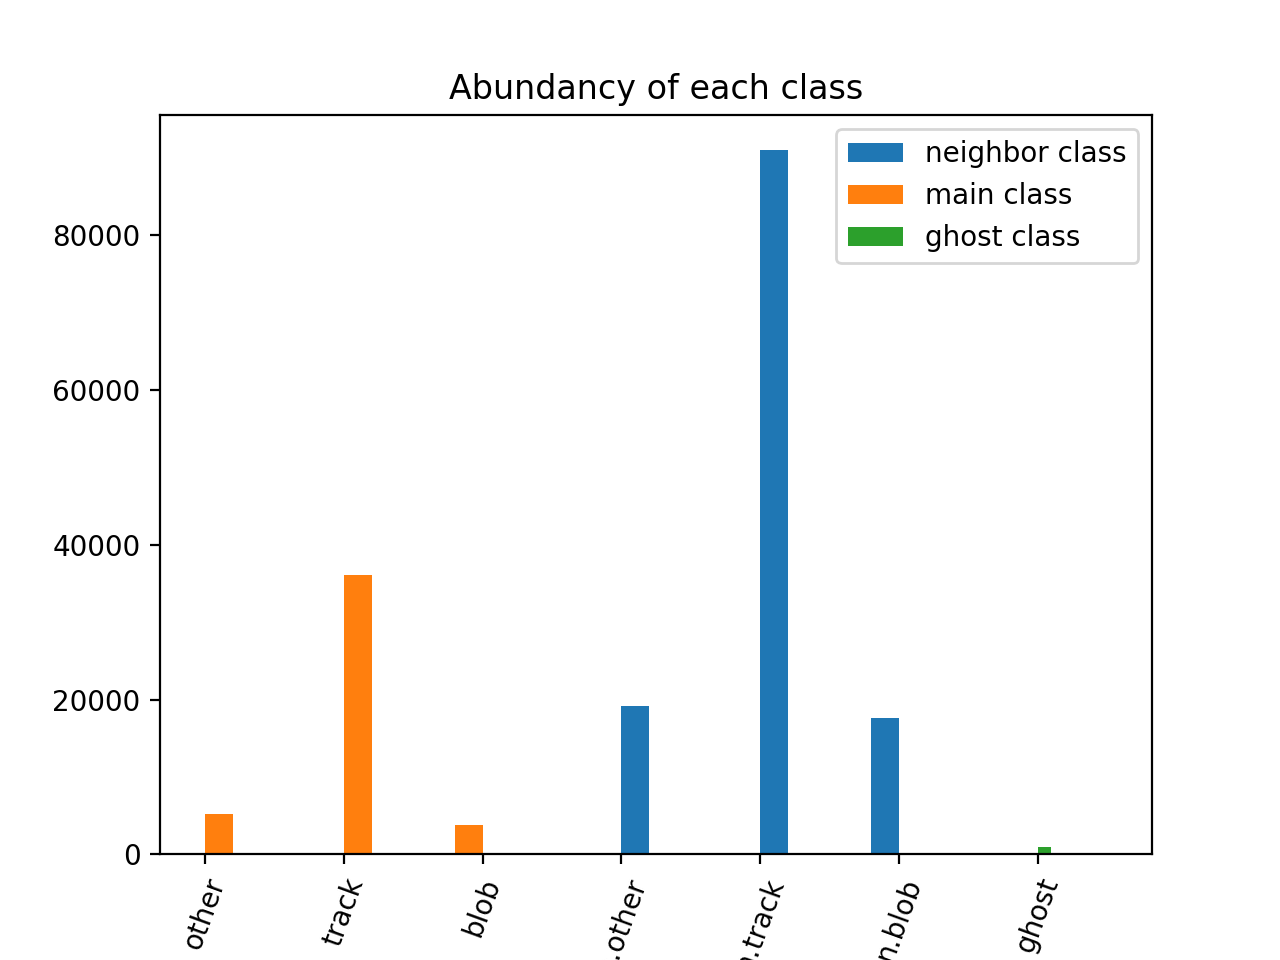

In [10]:
%matplotlib notebook
plt.hist(neigh_voxels.segclass, label = 'neighbor class')
plt.hist(origi_voxels.segclass, label = 'main class')
plt.hist(ghost_voxels.segclass, label = 'ghost class')
plt.title('Abundancy of each class')
plt.xticks(ticks = [1, 2, 3, 4, 5, 6, 7], 
           labels = ['other', 'track', 'blob', 'n.other', 'n.track', 'n.blob', 'ghost'], 
           rotation = 70)
plt.legend()
plt.show()

In [11]:
origi_abund = np.histogram(origi_voxels.segclass, bins = 3)[0]
neigh_abund = np.histogram(neigh_voxels.segclass, bins = 3)[0]
ghost_abund = np.histogram(ghost_voxels.segclass, bins = 3)[0]

In [12]:
print('Ratio track/other MC', origi_abund[1]/origi_abund[0], 'vs neighbours', neigh_abund[1]/neigh_abund[0])
print('Ratio track/blob MC',  origi_abund[1]/origi_abund[2], 'vs neighbours', neigh_abund[1]/neigh_abund[2])
print('Ratio other/blob MC',  origi_abund[0]/origi_abund[2], 'vs neighbours', neigh_abund[0]/neigh_abund[2])

Ratio track/other MC 6.993617021276596 vs neighbours 4.75015664160401
Ratio track/blob MC 9.450339780449555 vs neighbours 5.156728262101803
Ratio other/blob MC 1.3512807109252483 vs neighbours 1.0855912028114727


<IPython.core.display.Javascript object>


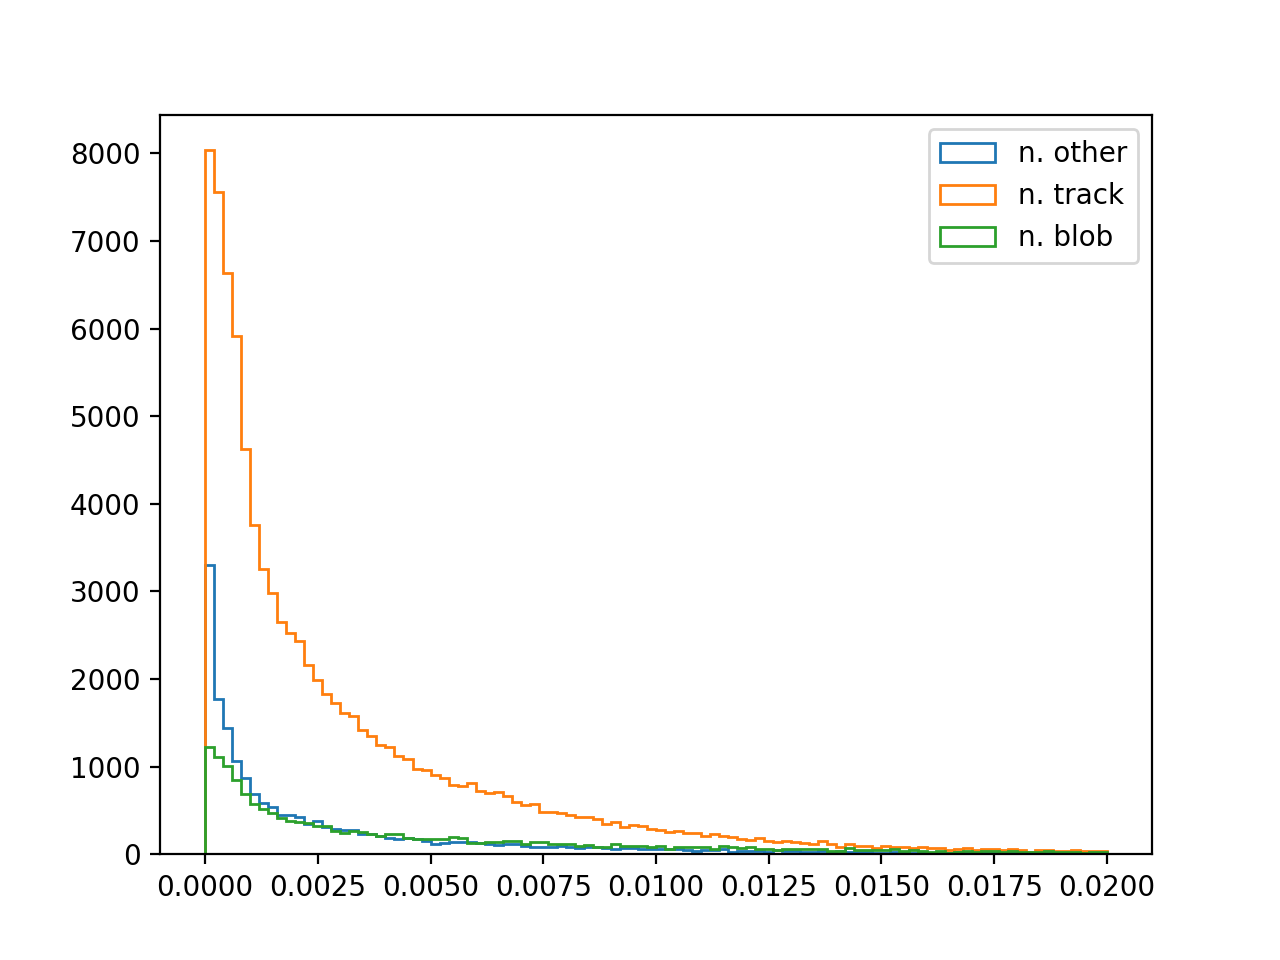

In [13]:
%matplotlib notebook
plt.hist(neigh_voxels[neigh_voxels.segclass == 4].energy, bins = 100, range = (0, 0.02), histtype = 'step', label = 'n. other')
plt.hist(neigh_voxels[neigh_voxels.segclass == 5].energy, bins = 100, range = (0, 0.02), histtype = 'step', label = 'n. track')
plt.hist(neigh_voxels[neigh_voxels.segclass == 6].energy, bins = 100, range = (0, 0.02), histtype = 'step', label = 'n. blob')
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


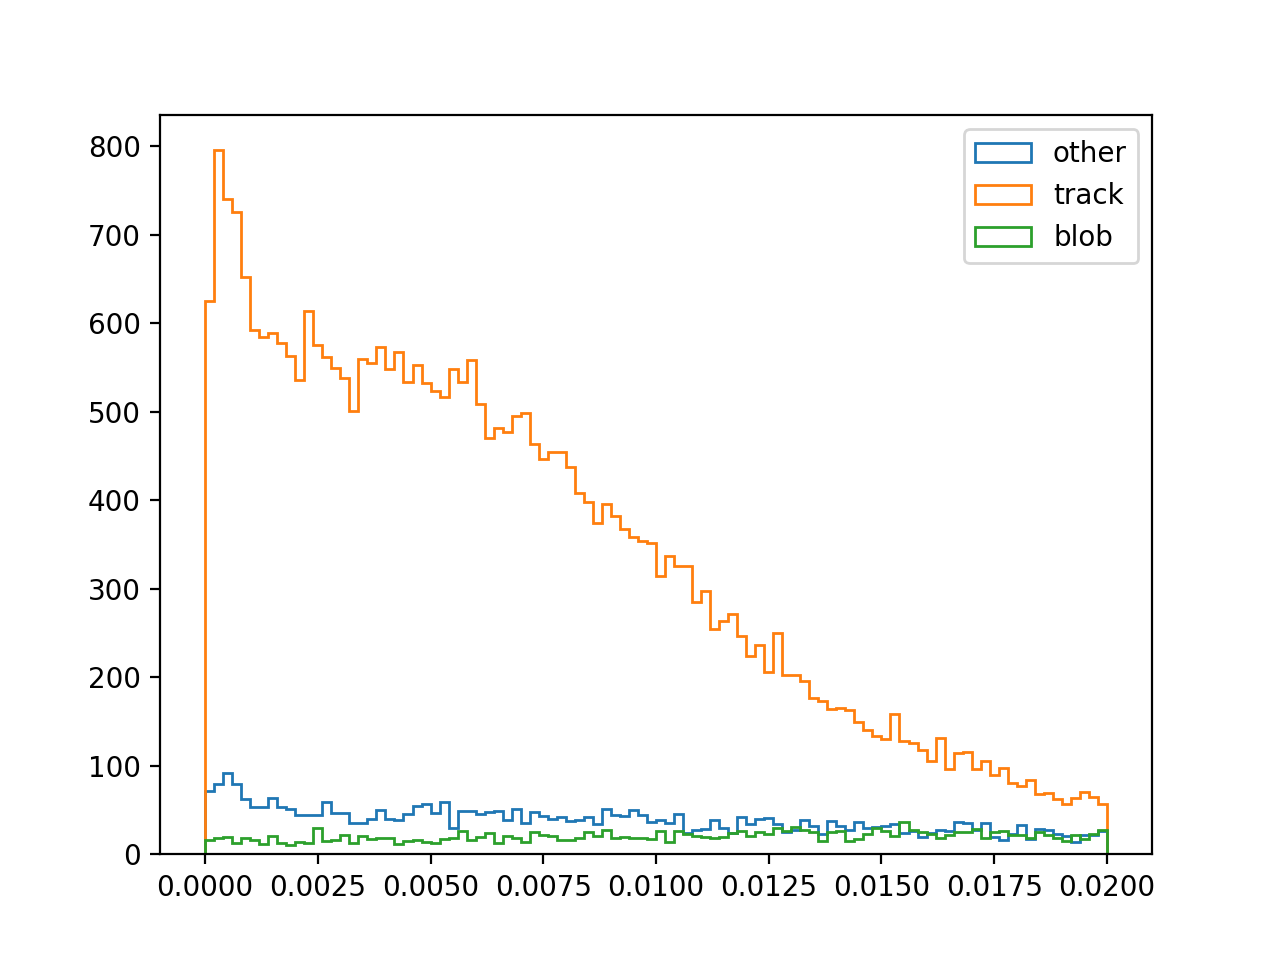

In [14]:
%matplotlib notebook
plt.hist(origi_voxels[origi_voxels.segclass == 1].energy, bins = 100, range = (0, 0.02), histtype = 'step', label = 'other')
plt.hist(origi_voxels[origi_voxels.segclass == 2].energy, bins = 100, range = (0, 0.02), histtype = 'step', label = 'track')
plt.hist(origi_voxels[origi_voxels.segclass == 3].energy, bins = 100, range = (0, 0.02), histtype = 'step', label = 'blob')
plt.legend()
plt.show()

Maomenos son unos ratios con sentido etc...

Ahora con más estadística (son los voxeles de todo un cut, unos ~3000 eventos)

In [17]:
labelled_cut = '/Users/mperez/NEXT/data_labelling/examples/prueba_cut24_all_2mm.h5'

In [18]:
labelled_MC_voxels_all = dio.load_dst(labelled_cut, 'DATASET', 'MCVoxels')
labelled_MC_hits_all   = dio.load_dst(labelled_cut, 'DATASET', 'MCHits')
labelled_beersheba_all = dio.load_dst(labelled_cut, 'DATASET', 'BeershebaVoxels')
eventInfo_all = dio.load_dst(labelled_cut, 'DATASET', 'EventsInfo')
binsInfo_all  = dio.load_dst(labelled_cut, 'DATASET', 'BinsInfo')
binsInfo_all = binsInfo_all.drop(np.arange(1, len(binsInfo_all), 1), axis = 0)

In [19]:
origi_voxels_all = labelled_beersheba_all[np.isin(labelled_beersheba_all.segclass, (1, 2, 3))]
neigh_voxels_all = labelled_beersheba_all[np.isin(labelled_beersheba_all.segclass, (4, 5, 6))]
ghost_voxels_all = labelled_beersheba_all[np.isin(labelled_beersheba_all.segclass, 7)]

In [20]:
len(origi_voxels_all) / len(labelled_beersheba_all), len(neigh_voxels_all) / len(labelled_beersheba_all), len(ghost_voxels_all) / len(labelled_beersheba_all)

(0.2603617822287233, 0.7338864558377605, 0.005751761933516303)

<IPython.core.display.Javascript object>


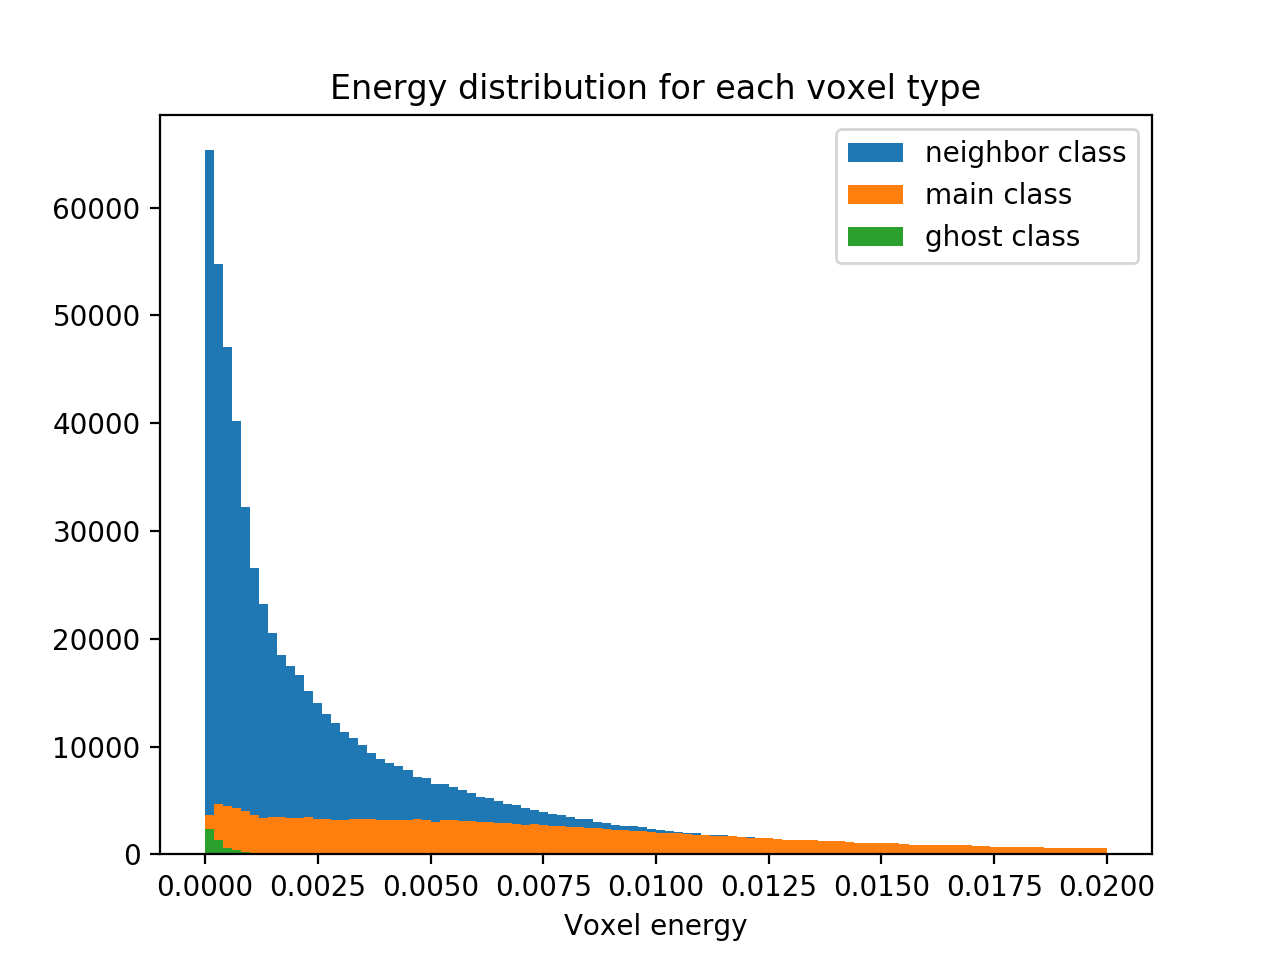

In [21]:
%matplotlib notebook
plt.hist(neigh_voxels_all.energy, bins = 100, range = (0, 0.02), label = 'neighbor class')
plt.hist(origi_voxels_all.energy, bins = 100, range = (0, 0.02), label = 'main class')
plt.hist(ghost_voxels_all.energy, bins = 100, range = (0, 0.02), label = 'ghost class')
plt.title('Energy distribution for each voxel type')
plt.xlabel('Voxel energy')
plt.legend()

plt.show()

<IPython.core.display.Javascript object>


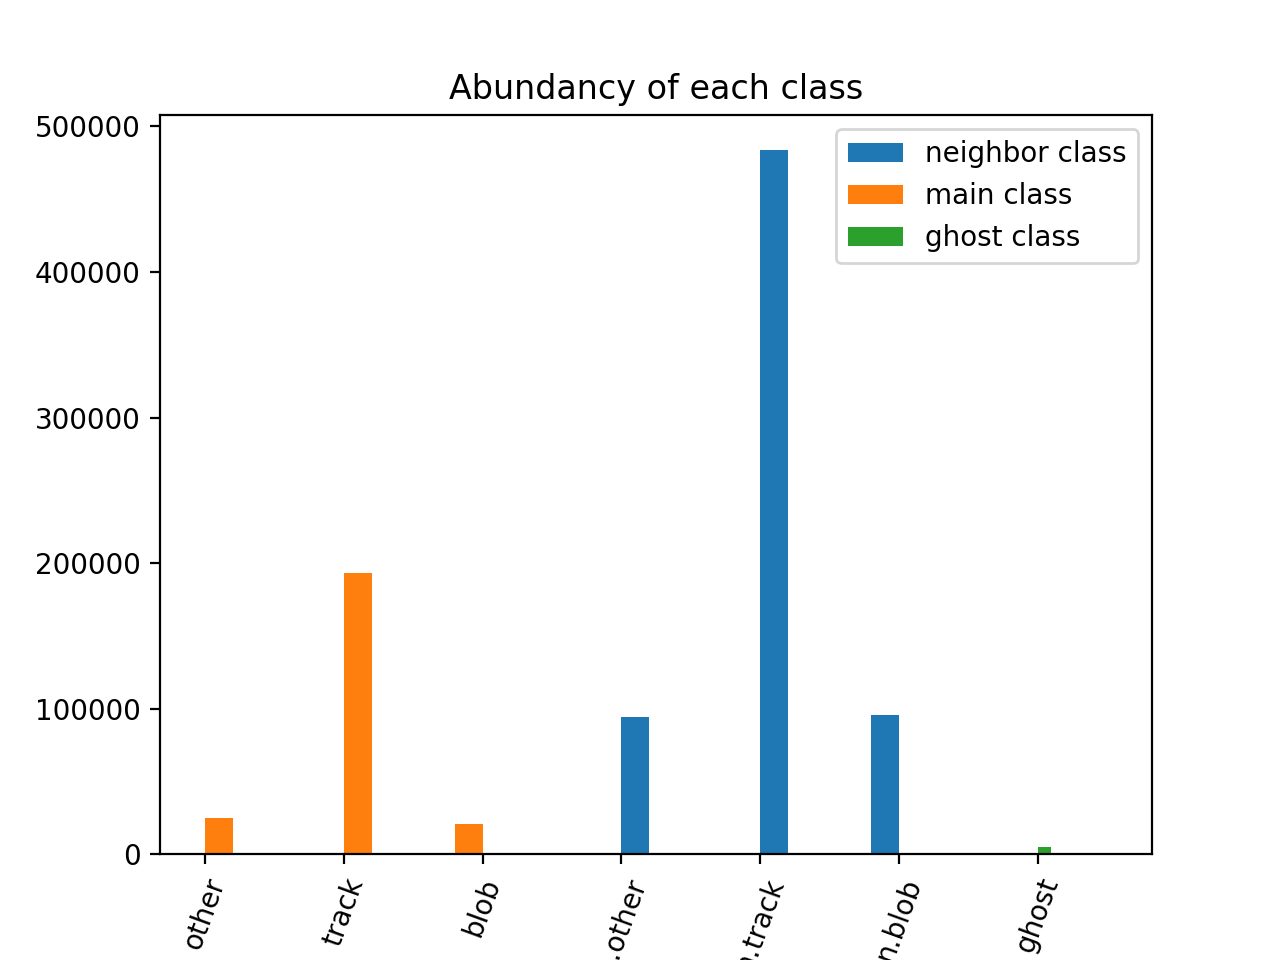

In [22]:
%matplotlib notebook
plt.hist(neigh_voxels_all.segclass, label = 'neighbor class')
plt.hist(origi_voxels_all.segclass, label = 'main class')
plt.hist(ghost_voxels_all.segclass, label = 'ghost class')
plt.title('Abundancy of each class')
plt.xticks(ticks = [1, 2, 3, 4, 5, 6, 7], 
           labels = ['other', 'track', 'blob', 'n.other', 'n.track', 'n.blob', 'ghost'], 
           rotation = 70)
plt.legend()
plt.show()

In [23]:
origi_abund_all = np.histogram(origi_voxels_all.segclass, bins = 3)[0]
neigh_abund_all = np.histogram(neigh_voxels_all.segclass, bins = 3)[0]
ghost_abund_all = np.histogram(ghost_voxels_all.segclass, bins = 3)[0]

In [24]:
print('Ratio track/other MC', origi_abund_all[1]/origi_abund_all[0], 'vs neighbours', neigh_abund_all[1]/neigh_abund_all[0])
print('Ratio track/blob MC',  origi_abund_all[1]/origi_abund_all[2], 'vs neighbours', neigh_abund_all[1]/neigh_abund_all[2])
print('Ratio other/blob MC',  origi_abund_all[0]/origi_abund_all[2], 'vs neighbours', neigh_abund_all[0]/neigh_abund_all[2])

Ratio track/other MC 7.683787547244878 vs neighbours 5.118054967392225
Ratio track/blob MC 9.373519704911667 vs neighbours 5.066189493099148
Ratio other/blob MC 1.2199087555814405 vs neighbours 0.9898661748215839


Hacer eficiencias de los cortes... esto para hits de MC es inmediato pienso (pq tengo las originales y las de despues del fiducial), para hits beersheba tengo las originales pero no las de despues del fiducial, quizás modificar funciones para q me dé el output. Luego para voxels fácil porque los voxeles con el corte los tengo yes or yes en los archivos de salida, y los voxeles sin corte sería hacer la producción igualmente sin corte.

Básicamente, lo que puedo hacer es añadir tb los hits de beersheba y hacer dos producciones: una con corte y otra sin corte, y así comparar hits/voxels de MC/beersheba (4 comparaciones)

O quizás pues hacer yo el corte a mano rápido pq tampoco era tan complicado pienso... además el voxelizado sin corte y con corte se puede hacer tan sólo con 2 producciones... y quizás comparar la diferencia entre sacar hits o sacar evento entero... en ppio si sacar hits no hace que se desconecten pues debería estar bien, y mirar cual es la eficiencia si quito eventos enteros...

Por ejemplo, ahora tengo una producción de todo sin cortes... hago una con cortes tal y como estamos y lo único que me quedaría sería tener los hits beersheba con cortes pero pienso q lo puedo hacer bien easy a mano